In [0]:
# https://www.youtube.com/watch?v=grzFM5XciAY&list=WL&index=4&t=468s
# from sage.all 0import *

In [1]:
a = 2 
b = 5
a = -4 
b = 6
# y^2 = x^3 + a*x + b
E = EllipticCurve([a, b])
print(E)

Elliptic Curve defined by y^2 = x^3 - 4*x + 6 over Rational Field


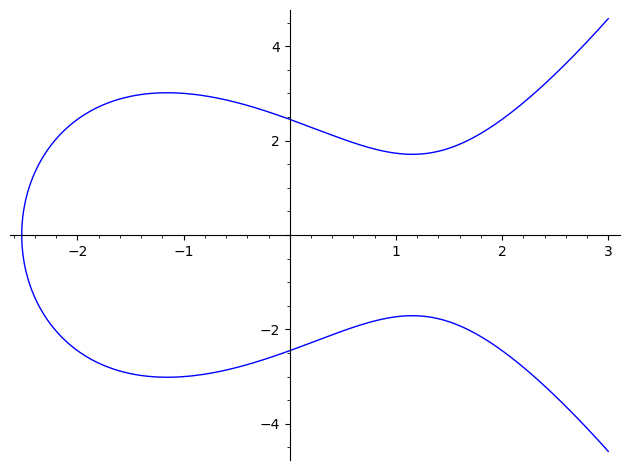

In [2]:
plot(E,(-3,3))

In [2]:
E.modular_form()

q + 3*q^3 + 4*q^5 + O(q^6)

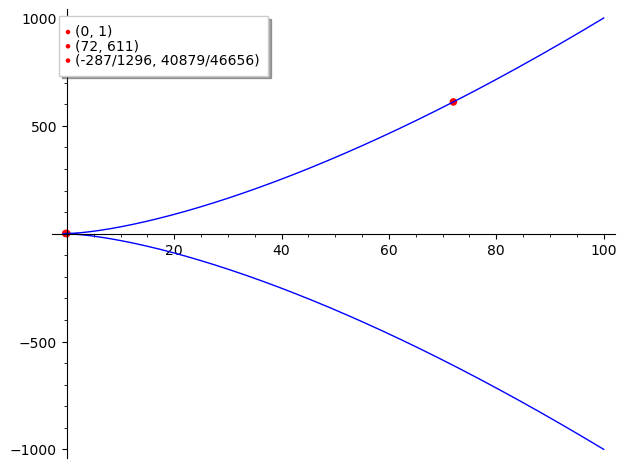

In [11]:
# Importing SageMath
import sage.all as sage

# Create an elliptic curve over the real numbers
a = 1 
b = 1
# y^2 = x^3 + a*x + b
E = sage.EllipticCurve([a, b])

# Define two points on the curve
# The notation E([x, y, z]) is a representation of a point on an elliptic curve in projective coordinates.

# In the projective coordinate system, a point (x, y, z) on an elliptic curve corresponds to the point (X, Y) in the affine coordinate system, where X = x/z and Y = y/z. So if z is not 0, (x, y, z) represents the same point as (x/z, y/z) in the affine coordinate system.

# If z is 0, this represents the "point at infinity" in the projective plane, which serves as the identity element for the group operation defined on the elliptic curve.

# So, in the case of E([0, 1, 1]), it corresponds to the affine point (0/1, 1/1) = (0, 1) on the elliptic curve.


P = E([0, 1, 1])
Q = E([72, 611, 1])

# Add the points
R = P + Q

# Create a plot of the curve
curve_plot = E.plot(xmin=-100, xmax=100)

# Create plots of the points
point_plots = [sage.point2d((i[0], i[1]), color='red', pointsize=30, legend_label=str(i)) for i in [P.xy(), Q.xy(), R.xy()]]

# Combine the plots
final_plot = curve_plot + sum(point_plots)

# Show the plot
final_plot.show()


In [2]:
# Importing SageMath
import sage.all as sage

# Define a prime number for the finite field
p = 97
p = 11

# Define the coefficients of the elliptic curve
a = 2
b = 3

a = 1
b = 1

# Create the elliptic curve over the finite field
# y^2 = x^3 + a*x + b
E = sage.EllipticCurve(sage.GF(p), [a, b])

# Define two points on the curve
P = E.random_element()
Q = E.random_element()

# Add the points
R = P + Q

# The output P: (1 : 6 : 1) represents a point P on an elliptic curve in projective coordinates.

# In projective coordinates, a point is represented by a triple (x : y : z). If z is not 0, this point corresponds to the point (x/z, y/z) in the affine plane.

# In your case, (1 : 6 : 1) corresponds to the affine point (1/1, 6/1) = (1, 6) on the elliptic curve.

# When z is 0, (x : y : z) represents the "point at infinity" in the projective plane. This is a special point on the elliptic curve which serves as the identity element for the group operation defined on the elliptic curve.

# Output the results
print(f"For an elliptic curve y^2 = x^3 + {a}*x + {b}")
print(f"P: {P}")
print(f"Q: {Q}")
print(f"P + Q: {R}")

For an elliptic curve y^2 = x^3 + 1*x + 1
P: (0 : 1 : 1)
Q: (2 : 0 : 1)
P + Q: (1 : 5 : 1)


In [7]:
# Importing SageMath
import sage.all as sage

# Define the coefficients of the elliptic curve
a = 1
b = 1

# Create the elliptic curve over the real numbers
E = sage.EllipticCurve(sage.RR, [a, b])

# Find two integer points on the curve
points = []
for x in range(100):  # Adjust the range as necessary
    y_squared = x**3 + a*x + b
    y = sage.sqrt(y_squared)
    if y in sage.ZZ:
        points.append((x, int(y)))
        if len(points) == 2:
            break

# Output the points
for i, point in enumerate(points):
    print(f"Point {i + 1}: {point}")


Point 1: (0, 1)
Point 2: (72, 611)


In [8]:
def modular_inverse(a, m):
    """Return the modular inverse of a mod m."""
    return pow(a, -1, m)

def elliptic_curve_is_point(Ep,P):
    return (P['y']**2 % Ep['p']) == (P['x']**3 + Ep['a']*P['x'] + Ep['b']) % Ep['p']

def elliptic_curve_point_add_two_points(Ep,P1, P2):
    x1 = P1['x']
    y1 = P1['y']
    x2 = P2['x']
    y2 = P2['y']    
    a = Ep['a']
    b = Ep['b']
    p = Ep['p'] 
    if x1 == x2 and y1 == y2:
        print(f"Error: x1{x1} == x2{x2} and y1{y1} == y2{y2}")
        return None
    
    inv_x_diff = modular_inverse(x2 - x1, p)
    L= ((y2 - y1) * inv_x_diff ) % p
    
    x3 = (L**2 - x1 - x2) % p
    y3 = (L * (x1 - x3) - y1) % p
    return {'x':x3,'y':y3}
    
def elliptic_curve_point_added_n_times(Ep,P, n):
    x = P['x']
    y = P['y']
    a = Ep['a']
    b = Ep['b']
    p = Ep['p']
    # 1/(2y)
    inv_2y = modular_inverse(2*y, p)
    for ii in range(n-1):
        # L = ((3*x**2 + a/(2*y)) % p
        L = ((3*x**2 + a) * inv_2y) % p
        print(f"L = ((3*x[{x}]**2 + a[{a}]']) * 1/(2*y)[{inv_2y}]) % p[{p}] = {L}")
        x3 = (L**2 - x -x) % p
        y3 = (L*(x - x3) - y) % p
        print(f"x3 = {x3}, y3 = {y3}")

        x = x3
        y = y3
    return {'x':x,'y':y}

def elliptic_curve_encrypt_message(Ep, G, pr, Pu, M):
    k = pr
    # C = [(k*G), (M + k*Pu)]
    
    # C1 = k*G
    C1 = Pu=elliptic_curve_point_added_n_times(Ep,G, k)
    
    # C2 = (M + k*Pu)
    C2_1 = elliptic_curve_point_added_n_times(Ep,Pu, k)
    C2 = elliptic_curve_point_add_two_points(Ep, M, C2_1)
    return [C1, C2]

Ep={'a':1, 'b':1, 'p':11}

# Generator
G={'x':1,'y':5}

# Private key
n = 2
pr = n

M={'x':4,'y':6}

print(elliptic_curve_is_point(Ep,G))

# Public key
Pu=elliptic_curve_point_added_n_times(Ep,G, 2)
print(f"Pu = {Pu}" )


Pu=elliptic_curve_point_added_n_times(Ep,G, 2)
print(f"Pu = {Pu}" )


R=elliptic_curve_point_add_two_points(Ep,{'x':3,'y':8},{'x':6,'y':5})
print(f"R={R}")

C = elliptic_curve_encrypt_message(Ep, G, pr, Pu, M)
print(f"C = [C1 {C[0]}, C2 {C[1]}]")

True
L = ((3*x[1]**2 + a[1]']) * 1/(2*y)[10]) % p[11] = 7
x3 = 3, y3 = 3
Pu = {'x': 3, 'y': 3}
L = ((3*x[1]**2 + a[1]']) * 1/(2*y)[10]) % p[11] = 7
x3 = 3, y3 = 3
Pu = {'x': 3, 'y': 3}
R={'x': 3, 'y': 3}
L = ((3*x[1]**2 + a[1]']) * 1/(2*y)[10]) % p[11] = 7
x3 = 3, y3 = 3
L = ((3*x[3]**2 + a[1]']) * 1/(2*y)[2]) % p[11] = 1
x3 = 6, y3 = 5
C = [C1 {'x': 3, 'y': 3}, C2 {'x': 4, 'y': 5}]


In [1]:
-8 % 11

3